# RFC: Student Drinking Habits

Teen drinking is handled differently accross the world. The majority of countries have a legal drinking age of 18. Here in the U.S. the legal age is 21, which is tied for the highest legal drinking age in the world (except for countries where alcohol is illegal). The higher drinking age here reflects a specific cultural attitude toward alcohol. Here in the U.S. alcohol is widely considered a drug consumed to elicit physical and psychological effects. In contrast, countries in Mediterranean Europe view alcohol as a normal part of their diet and in turn have lower drinking ages.


## The Question

Does the culture surrounding alochol have an effect on high school student performance?  

Multiple studies have shown that the effects of alcohol on behavior is primarily based on social and cultural factors as opposed to its chemical effects [(1)](http://www.sirc.org/publik/drinking3.html). It follows that students in countries where alcohol is more socially acceptable might perform better in school if they consume alcohol compared to their peers in more restrictive countries.


## The Data:

A quick analysis of this dataset will give us an introductory view on how alcohol effects students performance.

The data contains information on age, gender, social habits, drinking habits and class scores for students at two secondary schools (high schools) in Portugal. This particular dataset focuses on a classes in math. The minimum purchase age in Portugal is 18 and the minimum drinking age is 16. The culture is also more accepting of consuming alcohol as part of a normal diet and not just as a recreational drug. 

The data comes from the following dataset: 

Using Data Mining To Predict Secondary School Student Alcohol Consumption. 
Fabio Pagnotta, Hossain Mohammad Amran 
Department of Computer Science,University of Camerino
[Link to paper](https://www.researchgate.net/publication/296695247_USING_DATA_MINING_TO_PREDICT_SECONDARY_SCHOOL_STUDENT_ALCOHOL_CONSUMPTION)
 

### Primary Attributes in dataset: 
sex - student's sex (binary: 'F' - female or 'M' - male) <br>
age - student's age (numeric: from 15 to 22) <br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
G3 - final grade (numeric: from 0 to 20) 

See full attribute information [here](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

file = ('C:\\Users\\Abe\\Data Science Bootcamp\\Student Alcohol Data\\student-mat.csv')
df = pd.read_csv(file, delimiter=';')

In [2]:
# There are 5 students who are older than 19 which do not represent the standard population of a secondary school
# I will remove these outliers
df.drop(df[df['age'] > 19].index, inplace=True)

Average Alcohol Consumption by Gender
         Dalc      Walc
sex                    
F    1.256039  1.961353
M    1.699454  2.644809


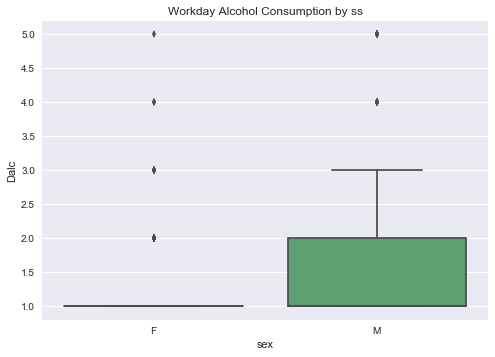

Ttest_indResult(statistic=5.2203550598905935, pvalue=2.9169889376922557e-07)


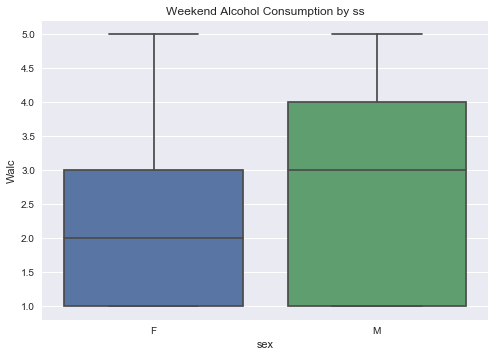

Ttest_indResult(statistic=5.4641788548654802, pvalue=8.3317286273136517e-08)


In [3]:
# Look at alcohol alcohol consumption rates by gender
# Males drink more than females both during the week and the weekend at a significant level

df_ss = df[['Dalc', 'Walc','sex']]

print ('Average Alcohol Consumption by Gender')
print (df_ss.groupby('sex').mean())
sns.boxplot(x='sex',y='Dalc',data=df_ss)
plt.title('Workday Alcohol Consumption by ss')
plt.show()
print (stats.ttest_ind(df_ss[df_ss['sex'] == 'M']['Dalc'],
                       df_ss[df_ss['sex'] == 'F']['Dalc']))
plt.title('Weekend Alcohol Consumption by ss')
sns.boxplot(x='sex',y='Walc',data=df_ss)
plt.show()
print (stats.ttest_ind(df_ss[df_ss['sex'] == 'M']['Walc'],
                       df_ss[df_ss['sex'] == 'F']['Walc']))

In [4]:
# Effect of Alcohol on Grades
# Doesn't look like much of an effect in total

df_d = df[['Dalc','G3']]
df_w = df[['Walc','G3']]

print (df_d.groupby('Dalc').agg({'G3':{'mean':'mean','count':'count'}}))
print (df_w.groupby('Walc').agg({'G3':{'mean':'mean','count':'count'}}))

col_d = [group['G3'] for alc, group in df_d.groupby('Dalc')]
col_w = [group['G3'] for alc, group in df_w.groupby('Walc')]

print (stats.f_oneway(*col_d))
print (stats.f_oneway(*col_w))

             G3      
           mean count
Dalc                 
1     10.689781   274
2      9.253333    75
3     10.640000    25
4     10.000000     8
5     11.000000     8
             G3      
           mean count
Walc                 
1     10.657718   149
2     10.082353    85
3     10.772152    79
4      9.686275    51
5     10.269231    26
F_onewayResult(statistic=1.5221265144776668, pvalue=0.19496729134563245)
F_onewayResult(statistic=0.66217574909812571, pvalue=0.61861243714800418)


             G3      
           mean count
Dalc                 
1     11.712963   108
2      9.214286    42
3     10.700000    20
4      9.333333     6
5     11.000000     7
F_onewayResult(statistic=2.6410559237758107, pvalue=0.035371443870197562)
Pearson R Coefficient and p value: (-0.12542949806851184, 0.090676431276654243)


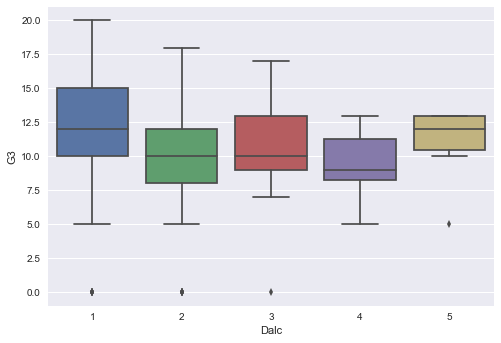

             G3      
           mean count
Walc                 
1     12.375000    56
2     11.117647    34
3     10.264706    34
4      9.702703    37
5     10.000000    22
F_onewayResult(statistic=2.664196499319563, pvalue=0.034092915265304176)
Pearson R Coefficient and p value: (-0.22152177382913124, 0.0025809152784931062)


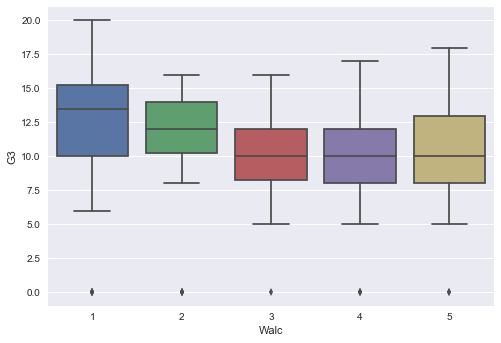

In [5]:
# Effect of alcohol consumption on grades for males
# Alcohol consumption has a statstically significant effect on grades for males

df_d = df[df['sex'] == 'M'][['Dalc','G3']]
df_w = df[df['sex'] == 'M'][['Walc','G3']]
col_d = [group['G3'] for alc, group in df_d.groupby('Dalc')]
col_w = [group['G3'] for alc, group in df_w.groupby('Walc')]

print (df_d.groupby('Dalc').agg({'G3':{'mean':'mean','count':'count'}}))
print (stats.f_oneway(*col_d))
print ('Pearson R Coefficient and p value: {}'.format(stats.pearsonr(df_d['Dalc'],df_w['G3'])))
sns.boxplot(x=df_d['Dalc'],y=df_d['G3'])
plt.show()

print (df_w.groupby('Walc').agg({'G3':{'mean':'mean','count':'count'}}))
print (stats.f_oneway(*col_w))
print ('Pearson R Coefficient and p value: {}'.format(stats.pearsonr(df_w['Walc'],df_w['G3'])))
sns.boxplot(x=df_w['Walc'],y=df_w['G3'])
plt.show()

# The boxplot here makes it look as though there is no correlation because it doesn't show n of each box
# Edit axis labels to show n
# Use a violin plot

### First Look

After looking at some data on the effects of alcohol consumption on grades, it looks like alcohol does have a small negative impact on classroom performance. This effect was found in males, possibly due to the fact that males drink more overall than women. 

One issue with this data set is that there is no value for students who do not drink at all. The lowest value in the survey was for very low alcohol consumption. Comparing students grades for those who don't drink against those who do could give us more information on the link between alcohol consumption and grades.

# The Experiment

In order to evaluate the effect of culture & alcohol consumption on grades we need data from schools accross different cultures. 

## Set Up

If we picked schools at random, there is a high likeliyhood that our results would be cofounded by the effect of school quality. In order to control for this our best option would be to find a school which operates accross cultures. A potential candidate would be the Department of Defense Dependent Schools. These schools exist in many different countries, but follow the same curriculum and standards put forth by the Department of Defense Education Activity. We would need to make sure that the student make-up is local enough so that the culture is not overwhelmingly U.S. influenced. 

[[Create your own bell curve for each class]]

Similar to the previous study, we should focus on one specific class, for example a math class generally taken in the 2nd or 3rd year

Anonymous Survey:
- Sex
- Age
- How much alcohol do you consume during the work week? (In units. One unit = 1 beer, 1 shot or 1 glass of wine)
- How much alcohol do you consume during the weekend? (In units. One unit = 1 beer, 1 shot or 1 glass of wine)
- Grades

Self reporting on illegal activity is always suspect, let alone for a minor. Its very likely that students in general would underreport their alcohol consumption. 

## Success

Success would be defined as collecting enough data to be able to determine if there are differences in alcohol consumption and their effect on grades in different countries. 